In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:

sns.set(style="whitegrid")
%matplotlib inline

df = pd.read_csv("/root/lanyun-tmp/prediction/data/train_f.csv")
print("数据量：", df.shape)


feature_cols = [
    "buy_x", "cart_x", "fav_x", "pv_x",
    "buy_y", "cart_y", "fav_y", "pv_y",
    "total_act",
    "ratio_buy", "ratio_cart", "ratio_fav", "ratio_pv",
    "buy_last1d", "cart_last1d", "fav_last1d", "pv_last1d",
    "buy_last3d", "cart_last3d", "fav_last3d", "pv_last3d"
]

X = df[feature_cols]
y = df["event"]
user_ids = df["user_id"]


数据量： (987984, 24)


In [4]:
df = pd.read_csv("/root/lanyun-tmp/prediction/data/train_f.csv")

feature_cols = [
    "buy_x", "cart_x", "fav_x", "pv_x",
    "buy_y", "cart_y", "fav_y", "pv_y",
    "total_act",
    "ratio_buy", "ratio_cart", "ratio_fav", "ratio_pv",
    "buy_last1d", "cart_last1d", "fav_last1d", "pv_last1d",
    "buy_last3d", "cart_last3d", "fav_last3d", "pv_last3d"
]
X = df[feature_cols]
y = df["event"]
user_ids = df["user_id"]


In [12]:
X_train, X_test, y_train, y_test, train_ids, test_ids = train_test_split(
    X, y, user_ids, test_size=0.2, stratify=y, random_state=42
)
print("正负样本分布（测试集）：")
print(y_test.value_counts())

正负样本分布（测试集）：
event
0    193454
1      4143
Name: count, dtype: int64


In [14]:
# 4. Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, pred_lr)
print("Logistic Regression AUC:", auc_lr)

Logistic Regression AUC: 1.0


In [19]:
# 预测概率
pred_prob_lr = model_lr.predict_proba(X_test)[:, 1]

# 保存为 CSV
df_lr_out = pd.DataFrame({
    "user_id": test_ids,
    "event": y_test,
    "prob": pred_prob_lr
})
df_lr_out.to_csv("logistic_prob.csv", index=False)


In [15]:
# 5. LDA
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)
pred_lda = model_lda.predict_proba(X_test)[:, 1]
auc_lda = roc_auc_score(y_test, pred_lda)
print("LDA AUC:", auc_lda)

LDA AUC: 0.9353365548188992


In [20]:
pred_prob_lda = model_lda.predict_proba(X_test)[:, 1]

df_lda_out = pd.DataFrame({
    "user_id": test_ids,
    "event": y_test,
    "prob": pred_prob_lda
})
df_lda_out.to_csv("lda_prob.csv", index=False)


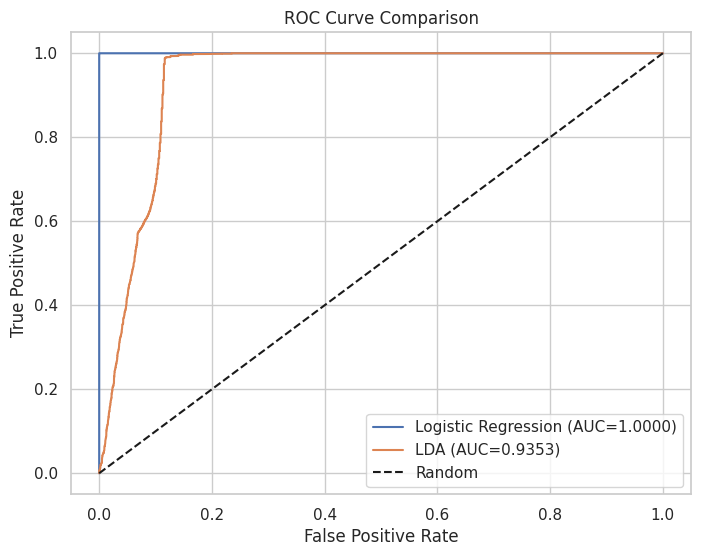

In [16]:
#ROC Curve 可视化
fpr_lr, tpr_lr, _ = roc_curve(y_test, pred_lr)
fpr_lda, tpr_lda, _ = roc_curve(y_test, pred_lda)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc_lr:.4f})")
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC={auc_lda:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

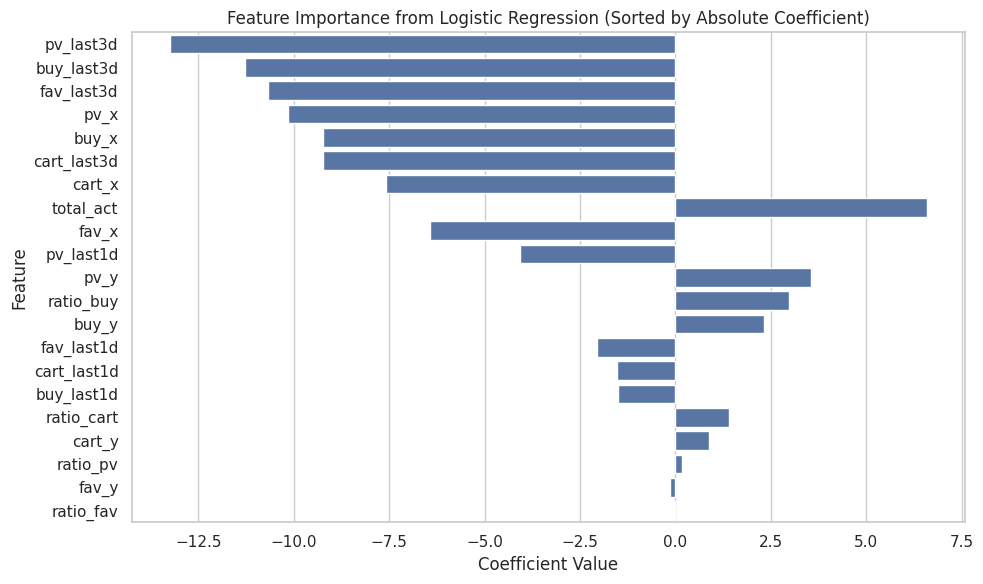

In [18]:
#Logistic 回归权重分析
coef_series = pd.Series(model_lr.coef_[0], index=feature_cols).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=coef_series.values, y=coef_series.index)
plt.title("Feature Importance from Logistic Regression (Sorted by Absolute Coefficient)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()